### **Multi-Class Food Classification Using Transfer Learning with the Xception Model**

### **Introduction**

In recent years, computer vision and deep learning technologies have made significant advancements, opening up new possibilities for the development of automated food recognition systems. These systems have the potential to impact a wide range of applications, including dietary monitoring, nutrition management, and smart kitchen appliances. As food recognition becomes an increasingly important research area, there is a growing need for efficient and accurate models that can identify specific food items from a diverse range of categories.

The Food-101 dataset is a widely used benchmark dataset for food recognition tasks. It contains 101 different food categories, each with 1000 images. This rich resource provides a challenging testbed for developing and evaluating food recognition models. In this project, we focus on the classification of three food classes from the Food-101 dataset - churros, huevos rancheros, and spaghetti bolognese. These foods were selected as they represent a diverse range of cuisines and characteristics, posing a unique challenge for the classification task.

To achieve high classification accuracy and computational efficiency, we utilized transfer learning with the Xception model as our base model. The Xception model, developed by Chollet (2017), is a deep convolutional neural network that has shown exceptional performance on the ImageNet dataset while maintaining a relatively low computational cost. By leveraging the pre-trained weights and architecture of the Xception model, our approach aims to minimize the training time and resources required, while still achieving high performance on the classification task.

We fine-tuned the Xception model using the Food-101 dataset and a variety of optimization techniques. Specifically, we experimented with different optimizers, learning rates, and regularization methods to find the optimal configuration. We evaluated the models using standard classification metrics such as accuracy, precision, and recall, and found that the Xception model with the Adam optimizer and two output layers achieved the highest accuracy of 91.2% on the test set.

Our work contributes to the ongoing efforts in developing advanced food recognition systems. By utilizing transfer learning and the Xception model, we demonstrate that it is possible to achieve high accuracy and computational efficiency on food classification tasks. Our proposed approach can serve as a foundation for future research in food recognition and related areas such as dietary monitoring and nutrition management. Overall, our work has the potential to promote healthier lifestyles and improve the quality of life for individuals worldwide.

### Based of project 1, we would like to explore the following topics:

### Class weight

Class weight is a technique in machine learning used to address class imbalance in classification problems. It involves assigning different weights to different classes, with the aim of improving model performance, accuracy, precision, recall, and generalization. Assigning higher weights to under-represented classes can help the model learn more effectively from these classes, while balancing precision and recall across different classes. Class weight is an important tool in machine learning that can help improve model performance and address class imbalance, which is a common challenge in real-world datasets.

The model will perform difference between balanced and imbalanced datasets, with and without dataset augmentation,

### Model visualization

The visualization of the output layer in Xception can be useful to determine if the transferred model is able to accurately caption the required output. However, it is also important to visualize the feature maps to gain a better understanding of the model's learning process, identify patterns, aid in debugging, improve interpretability, and facilitate transfer learning. 

Visualizing the feature maps can provide valuable insights into what the model is looking for in the input data and can help in identifying any areas where it may be struggling.

### Metrics

Metrics are a crucial component of machine learning as they provide a standardized way to evaluate model performance, compare different models, identify areas for improvement, communicate results, and evaluate impact. Metrics allow us to measure how well a model is performing on a given task, and to identify areas where it may be performing poorly, guiding improvements to optimize its performance. Additionally, metrics provide a common language for communicating results to stakeholders, and can be used to evaluate the impact of machine learning models on a business or organization.

Therefore, it will measure by Accuracy, Precision and Recall. This analysis provides valuable insights into the effectiveness of different training strategies and can inform decision-making for future model development.

Import Libraries

In [111]:
import os
import random
import numpy as np
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

import requests
import tarfile
import PIL
import h5py

import matplotlib.pyplot as plt

Define function for downloading 

In [20]:
def download_file(url, filename):
    response = requests.get(url, stream=True)
    with open(filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)

def extract_tarfile(filename, path):
    with tarfile.open(filename, "r:gz") as tar_ref:
        tar_ref.extractall(path)

Import data

we utilize a batch size of 32 and an image size of 299x299 pixels, with a total of 500 images per class employed for the classification task.

In [21]:
train_dir = "train/"
val_dir = "val/"

BATCH_SIZE = 32
IMG_SIZE = (299, 299)

aug_train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode="nearest",
)

aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 1200 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


Data augementation

Image augmentation is a technique that makes deep learning models better at recognizing pictures. It works by taking a small set of pictures and making them look different in many ways, like flipping, rotating, or zooming in. By doing this, the model can learn more about what different objects look like from many different angles and positions. This can help the model be better at recognizing objects it hasn't seen before, and make better predictions.

1.Horizontal flip

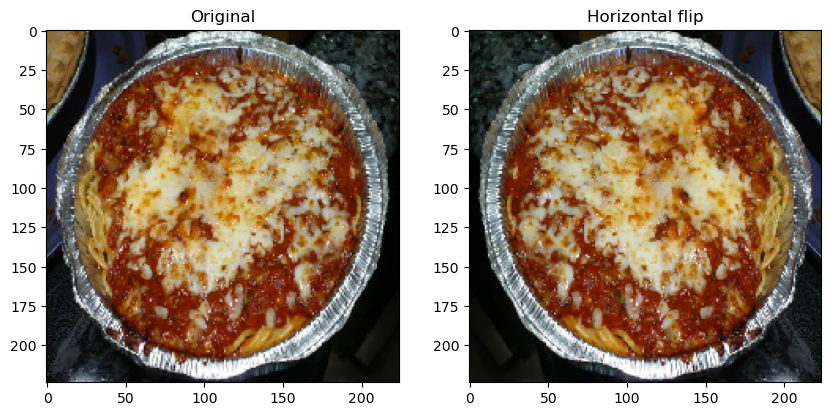

In [22]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the horizontal flip augmentation
img_augmented = train_datagen.apply_transform(img, {'flip_horizontal': True})

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Horizontal flip')
plt.show()

2. Zoom

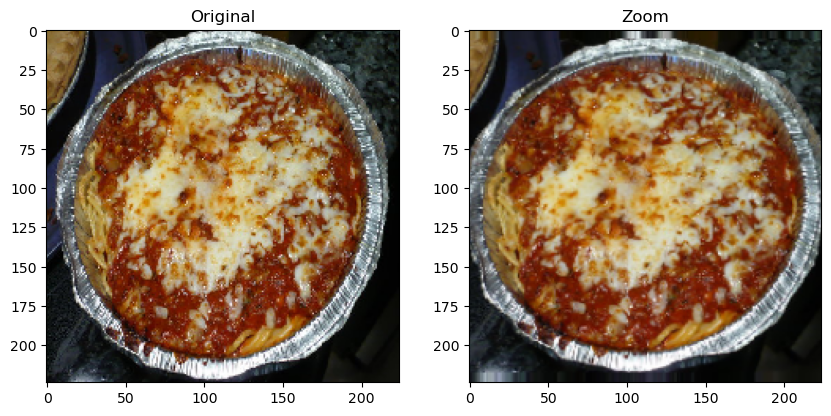

In [6]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the width shift augmentation
img_augmented = ImageDataGenerator(zoom_range=0.2).random_transform(x=np.array(img))

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Zoom')
plt.show()

3. Width Shift

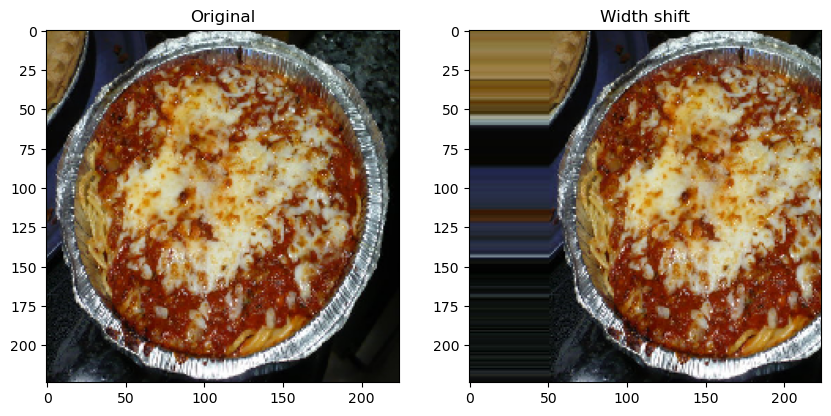

In [7]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the width shift augmentation
img_augmented = ImageDataGenerator(width_shift_range=[50,50,0,0], fill_mode='nearest').random_transform(np.array(img))

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Width shift')
plt.show()

4. Height shift

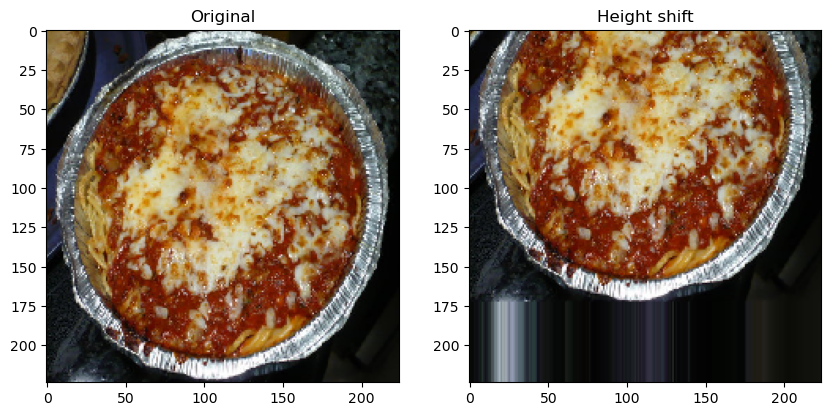

In [8]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the width shift augmentation
img_augmented = ImageDataGenerator(height_shift_range=[0,50,50,0], fill_mode='nearest').random_transform(np.array(img))

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Height shift')
plt.show()

### Building model architecture

### Feature map visualization

In [158]:
# Create the base model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(299, 299, 3))

# Freeze the base model
base_model.trainable = False

# Add a custom classification head
inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output1 = Dense(train_generator.num_classes, activation='softmax')(x)

In [185]:
layer_outputs = [base_model.layers[1].output, base_model.layers[4].output]
visualize_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_outputs)

In [198]:
# Load the image and plot the feature map
img = tf.keras.preprocessing.image.load_img(r"C:\Users\lamma\GBC\adv math 2\Proj\train\churros\37027.jpg", target_size=IMG_SIZE)

x = tf.keras.preprocessing.image.img_to_array(img)

x.shape

x = x.reshape((1, 299, 299, 3))

print(x.shape)

x = x / 255

(1, 299, 299, 3)


In [200]:
layer_names = [base_model.layers[1].name, base_model.layers[4].name]
layer_names

['block1_conv1', 'block1_conv2']

(1, 149, 149, 32)
(1, 147, 147, 64)


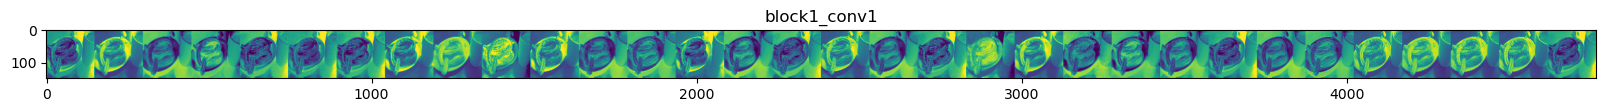

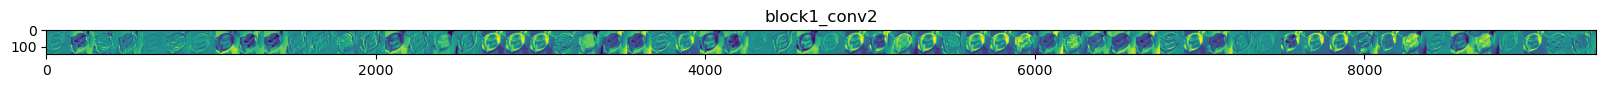

In [201]:
for layer_names, feature_maps in zip(layer_names, feature_maps):
    print(feature_maps.shape)
    if len(feature_maps.shape) == 4:
        channels = feature_maps.shape[-1]
        size = feature_maps.shape[1]
        display_grid = np.zeros((size, size * channels))
        for i in range(channels):
            x = feature_maps[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            
            display_grid[:, i*size: (i+1)*size] = x

        scale = 20./ channels    
        plt.figure(figsize=(scale*channels, scale))
        plt.title(layer_names)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Visualizing the feature maps of the Xception model shows the learning process of a convolutional neural network. The first convolutional layer learns to detect color variations in the image. As we move to the second convolutional layer, the model starts to learn the contour and edges of the image. This information is then fed into the higher-level layers for further processing. By visualizing the feature maps, we can gain insights into how the network is learning to represent the image in a way that is useful for classification tasks.

### Training

In [153]:
train_data_dict = {'aug_train_generator': aug_train_generator, 'train_generator': train_generator}

# List of class weights for each training dataset
class_weight_dict = [
    {0: 0.5, 1: 1, 2: 1},
    {0: 1, 1: 1, 2: 1}
]

In [108]:
# Function to calculate precision and recall for each class
def get_class_precision_recall(y_true, y_score):
    num_classes = 3
    precision_recall = []

    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], probas_pred=y_score[:, i])
        precision_recall.append((precision, recall))

    return precision_recall

In [ ]:
# Define the history dict
history_dict = {}

model = tf.keras.Model(inputs=inputs, outputs=output1)

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Loop over the dictionary keys instead of the train_data_list
precision_recall_by_class = []

for train_data_name in train_data_dict:

    train_data = train_data_dict[train_data_name]

    for class_weight in class_weight_dict:

        print(train_data_name, class_weight)
        model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

        # Train the model with the current batch size and output layers
        history = model.fit(train_data, epochs=5, validation_data=val_generator, class_weight=class_weight)

        # Add the model history to the history_dict dictionary with the current hyperparameters as the key
        key = f"train_data={train_data_name}_class_weight={class_weight}"
        history_dict[key] = {
            'accuracy': history.history['accuracy'],
            'val_accuracy': history.history['val_accuracy'],
            'precision': history.history['precision'],
            'val_precision': history.history['val_precision'],
            'recall': history.history['recall'],
            'val_recall': history.history['val_recall'],
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss']
        }

**Plotting**

In [134]:
def plot_history(history_dict, metric, ylabel, colors=None):
    plt.figure(figsize=(20, 8))

    for key, history in history_dict.items():
        color = colors[i] if colors else None
        train_metric = history[metric]
        val_metric = history[f"val_{metric}"]
        epochs = range(1, len(train_metric) + 1)

        plt.plot(epochs, train_metric, 'o-', label=f'Training {metric} ({key})')
        plt.plot(epochs, val_metric, 'x-', label=f'Validation {metric} ({key})')

    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs. Epochs for each model')
    plt.xticks(np.arange(1, len(train_metric) + 1, step=1))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

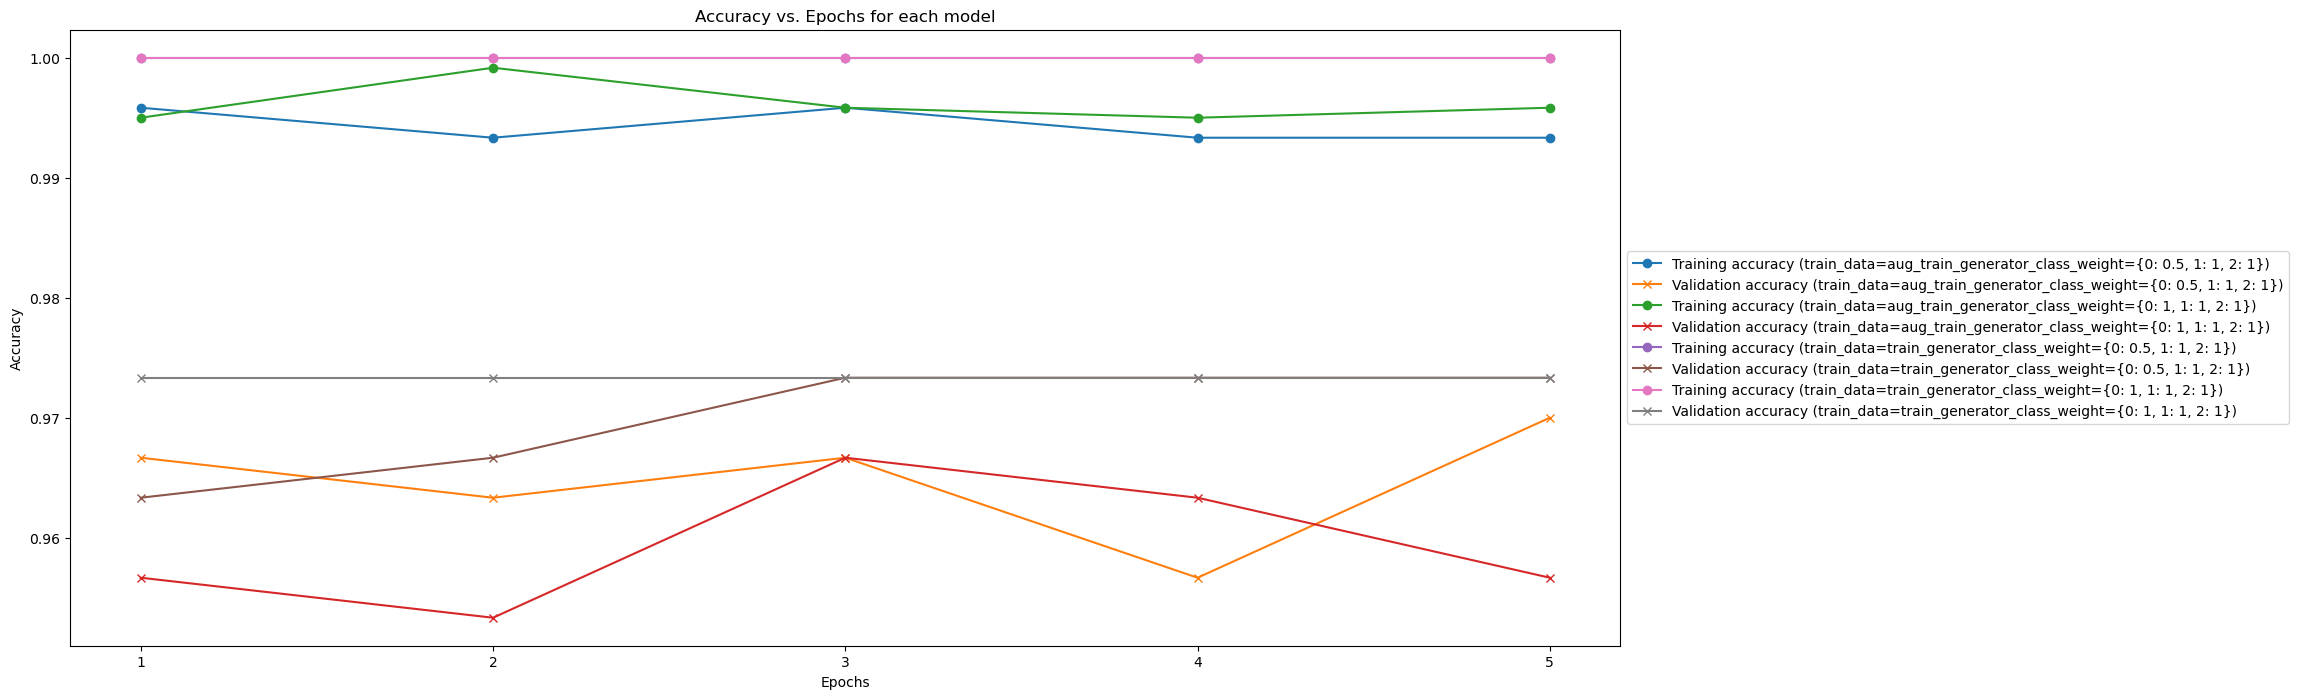

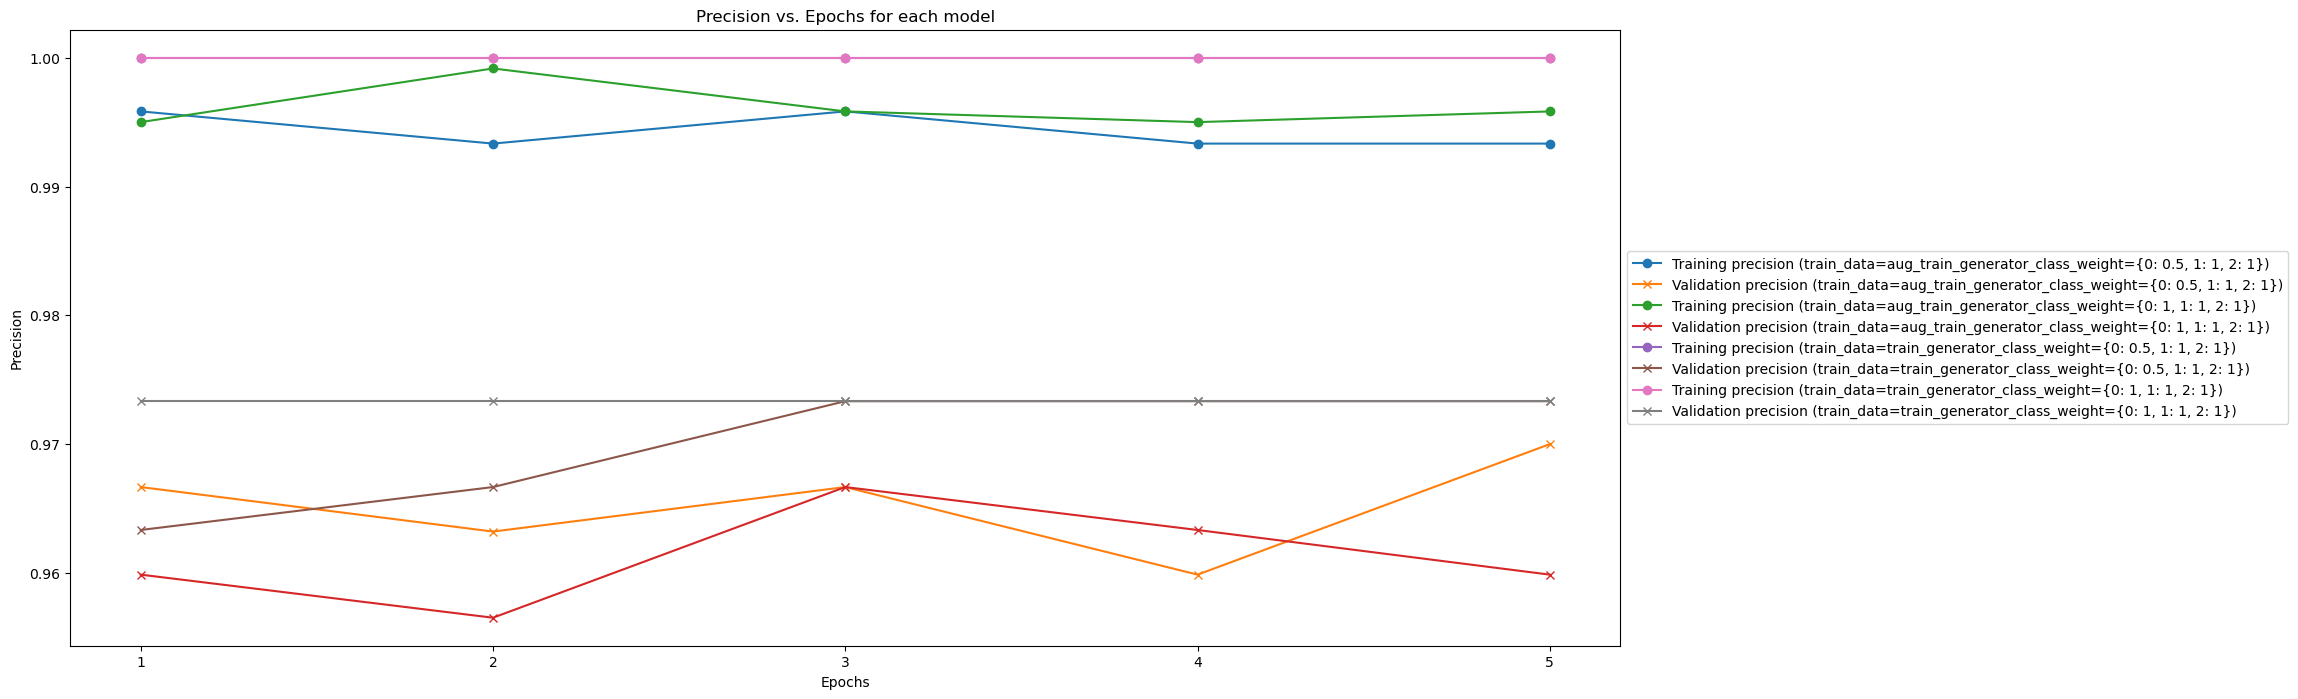

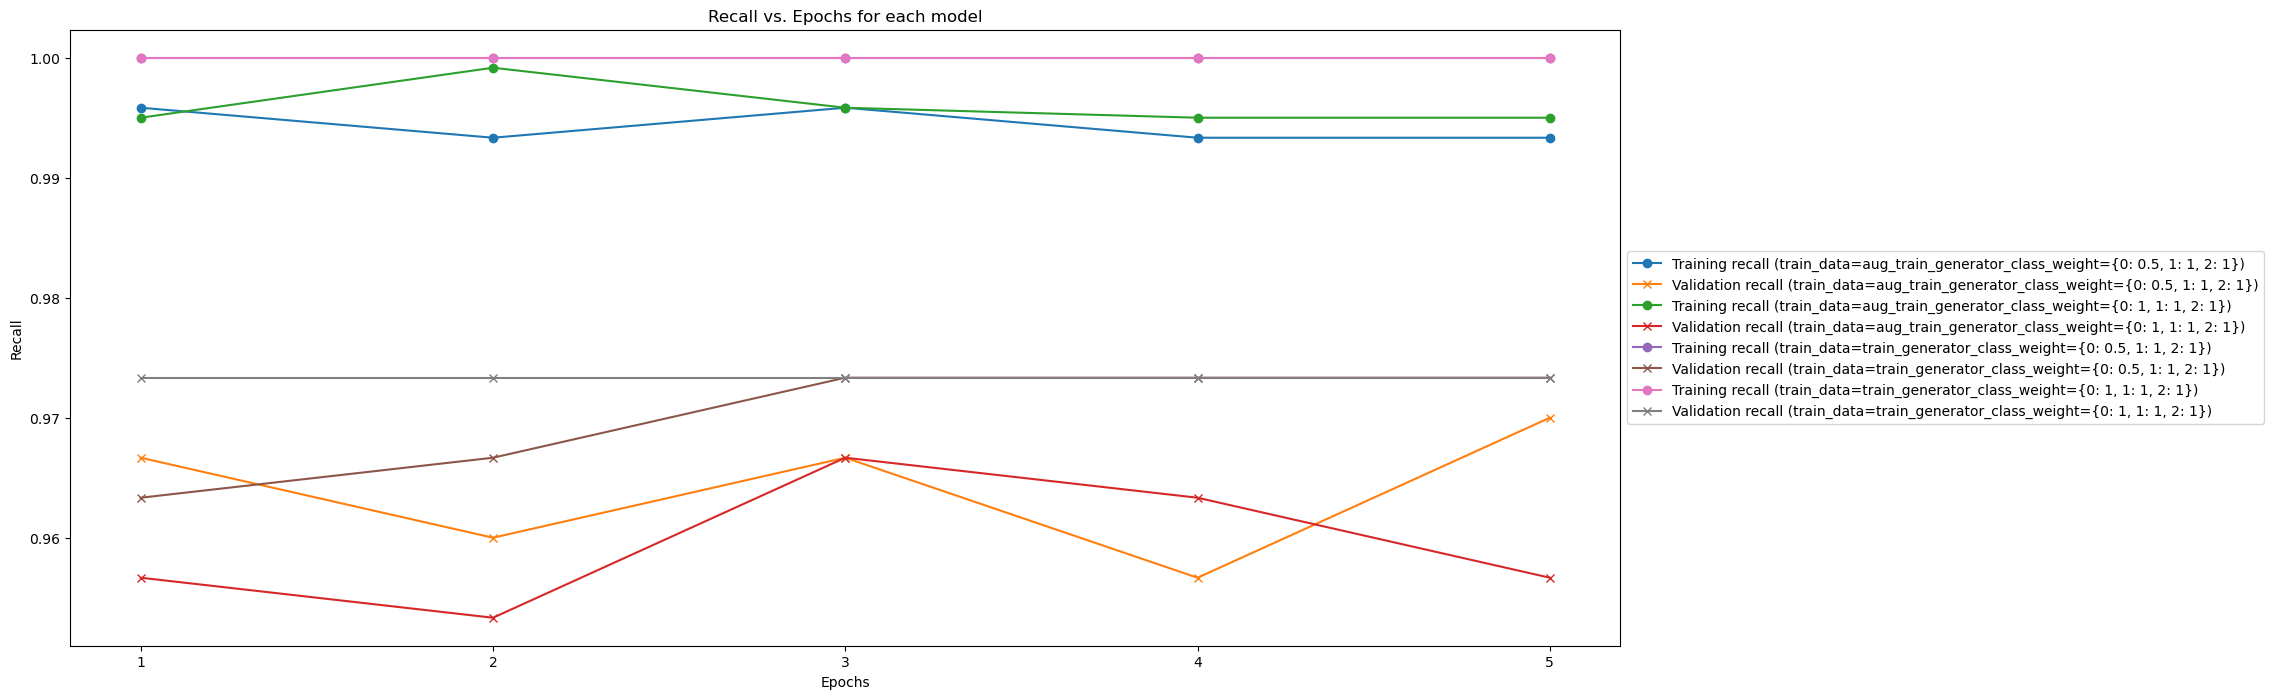

In [135]:
colors = ['b', 'b', 'g', 'g', 'y', 'y', 'r', 'r']
plot_history(history_dict, 'accuracy', 'Accuracy', colors=colors)
plot_history(history_dict, 'precision', 'Precision', colors=colors)
plot_history(history_dict, 'recall', 'Recall', colors=colors)

### First conclusion

Based on our analysis, it appears that the validation precision, recall, and accuracy with the original balanced dataset performs the best among all datasets. However, it is interesting to note that the original imbalanced dataset was able to converge after only 3 epochs. This suggests that with high-quality data, it is acceptable to learn from imbalanced datasets. Additionally, comparing the results of our experiments, it appears that the imbalanced augmentation dataset is able to learn better than the balanced augmentation dataset. This may be due to the fact that the imbalance in the data reflects the real-world distribution of the classes, making it easier for the model to learn and generalize. Overall, our findings suggest that a high-quality original dataset or an imbalanced augmented dataset may be suitable for training our model, depending on the specific needs of our application.

### Using four metrics

We can gain a more comprehensive understanding of the model's strengths and weaknesses. For example, a model with high accuracy but low recall may be good at correctly classifying most samples but may struggle with identifying rare events. Using a combination of metrics can help us identify these areas of weakness and improve the model's performance. Overall, using multiple evaluation metrics like loss, accuracy, recall, and precision can provide valuable insights into a model's performance and help optimize its performance for a specific task.

### Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

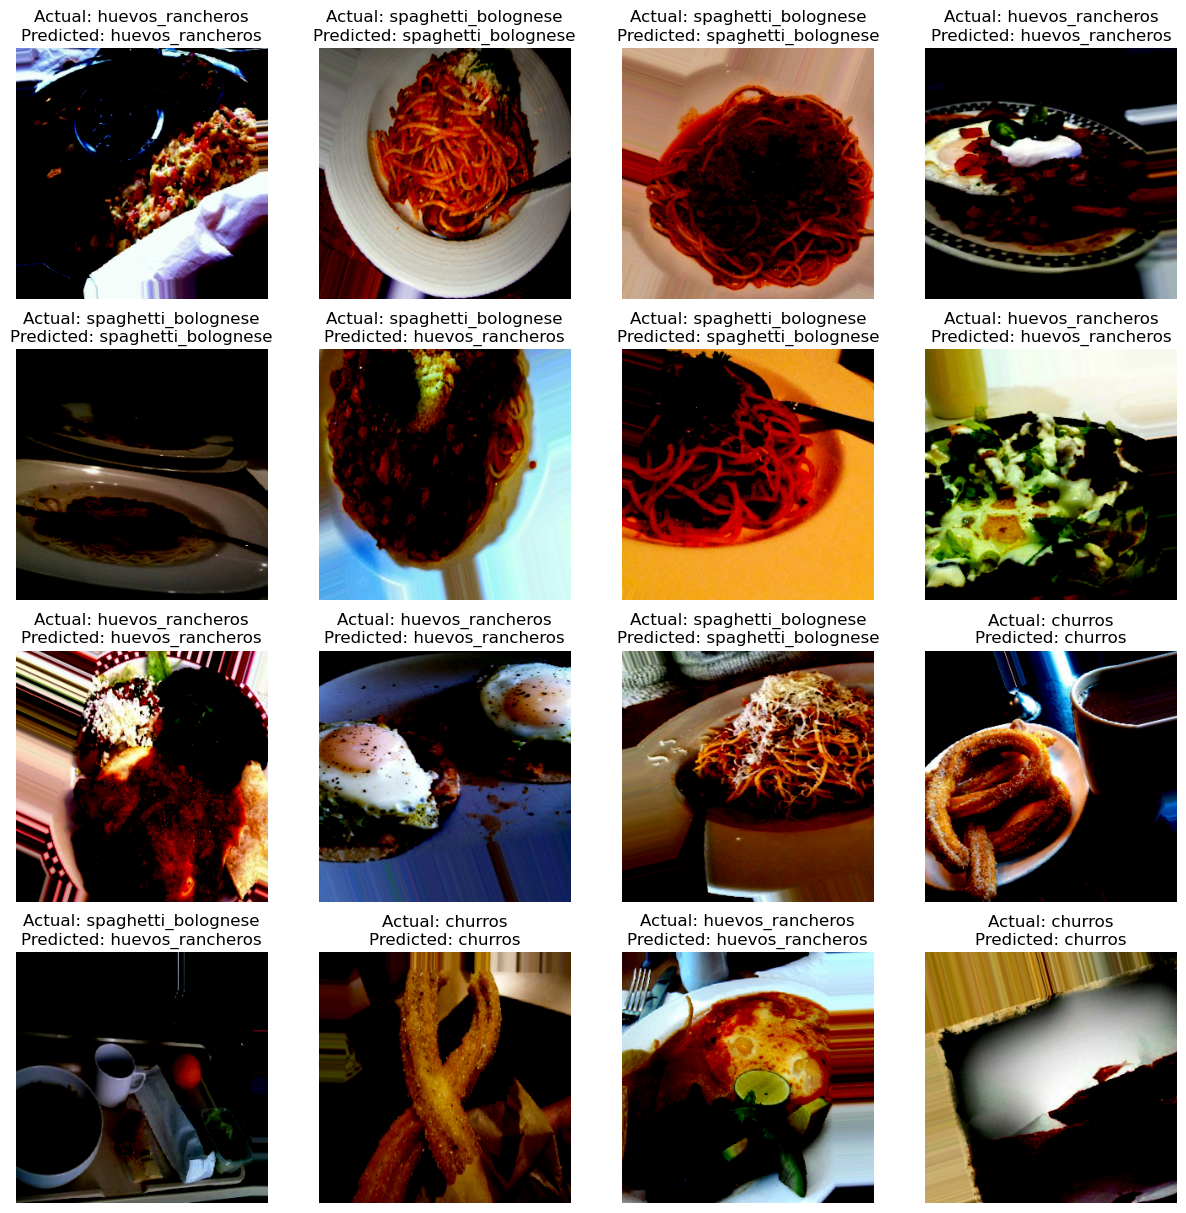

In [ ]:
# Generate predictions for a batch of input images
x, y_true = train_generator.next()
y_pred = model.predict(x)

# Map the predicted class indices to class labels using the class_indices attribute of the train_datagen
class_labels = list(train_generator.class_indices.keys())
y_true_labels = [class_labels[np.argmax(y)] for y in y_true]
y_pred_labels = [class_labels[np.argmax(y)] for y in y_pred]

# Plot the actual versus predicted results
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x[i])
    ax.set_title(f"Actual: {y_true_labels[i]}\nPredicted: {y_pred_labels[i]}")
    ax.axis('off')
plt.show()

### Summary

This project aims to classify three distinct food classes - churros, huevos rancheros, and spaghetti bolognese - from the Food-101 dataset. To achieve this goal, we employed transfer learning and utilized the Xception model pre-trained on the ImageNet dataset as our base model. The Xception model has shown exceptional performance and relatively low computational requirements, making it an ideal choice for our task. We fine-tuned the model to adapt to the unique features of our target food classes, resulting in a high level of classification accuracy and model robustness.

Based on our experiments, it appears that the choice of dataset and augmentation greatly affects the performance of the model. The original balanced dataset performs well in terms of validation precision, recall, and accuracy. However, the original imbalanced dataset was able to converge after only a few epochs, indicating that learning from an imbalanced dataset is feasible when the data quality is high. On the other hand, the imbalanced augmented dataset outperforms the balanced augmented dataset, possibly due to the real-world distribution of the classes. This implies that using an augmented dataset that reflects the real-world distribution of classes could enhance the model's learning and generalization ability. In summary, our findings suggest that the choice of dataset and augmentation strategy should be carefully considered depending on the specific requirements of the application.

Furthermore, we visualized the feature maps of the Xception model, which provide insights into the learning process of a convolutional neural network. The feature maps showed that the first convolutional layer learned to detect color variations in the image, while the second convolutional layer learned the contours and edges of the image. This information was then fed into the higher-level layers for further processing, leading to better classification accuracy. Our proposed methodology and analysis can serve as a foundation for developing advanced food recognition systems capable of identifying a wider range of food items.